# Bernstein-Vazirani Algorithm

In [10]:
%pip install qiskit[visualization]

Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install qiskit_aer

Note: you may need to restart the kernel to use updated packages.


In [12]:
from qiskit_aer import AerSimulator

We've already implemented the Deutsch-Jozsa circuit above, and here we will make use of it to solve the Bernstein-Vazirani problem. First we'll define a function that implements a query gate for the Bernstein-Vazirani problem given any binary string 
s.

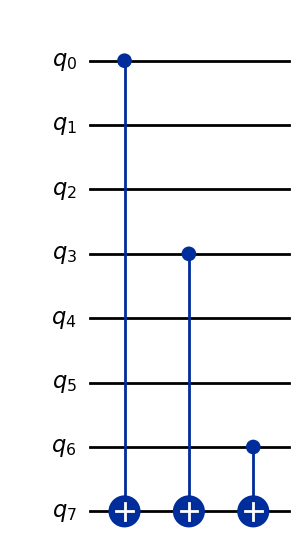

In [13]:
# Replace ?
from qiskit import QuantumCircuit
import numpy as np

def bv_function(s):
    """
    Create a Bernstein-Vazirani function from a string of 1s and 0s.
    """
    qc = QuantumCircuit(len(s) + 1)
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc

display(bv_function("1001001").draw('mpl'))

Now we can run the Deutsch-Jozsa circuit on the function.

In [14]:
# Replace ?
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [15]:
# Replace ?
def bv_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    return result.get_memory()[0]

display(bv_algorithm(bv_function("1001001")))

'1001001'

# End of Notebook